In [4]:
# Cell 1: XML Validation
import xml.etree.ElementTree as ET
from io import StringIO

# XML string would go here
xml_string = """<?xml version="1.0" encoding="UTF-8"?>
<World>
    <America>
        <Canada/>
        <USA>
            <NewYork/>
            <Boston/>
        </USA>
        <Mexico/>
    </America>
    <Europe>
        <Italy/>
        <Germany>
            <Berlin/>
        </Germany>
    </Europe>
    <Africa/>
</World>"""

# Parse and validate XML
try:
    tree = ET.parse(StringIO(xml_string))
    root = tree.getroot()
    print("XML is valid!")
    print(f"Root element: {root.tag}")
    print(f"Number of continents: {len(root)}")
except ET.ParseError as e:
    print(f"XML parsing error: {e}")

XML is valid!
Root element: World
Number of continents: 3


In [ ]:
"""
@startXML
<?xml version="1.0" encoding="UTF-8"?>
<World>
    <America>
        <Canada/>
        <USA>
            <NewYork/>
            <Boston/>
        </USA>
        <Mexico/>
    </America>
    <Europe>
        <Italy/>
        <Germany>
            <Berlin/>
        </Germany>
    </Europe>
    <Africa/>
</World>
@endXML
"""

In [5]:
# Cell 2: YAML Validation
import yaml

# YAML string would go here
yaml_string = """World:
  America:
    Canada: {}
    USA:
      New York: {}
      Boston: {}
    Mexico: {}
  Europe:
    Italy: {}
    Germany:
      Berlin: {}
  Africa: {}"""

# Parse and validate YAML
try:
    data = yaml.safe_load(yaml_string)
    print("YAML is valid!")
    print(f"Root element: {list(data.keys())[0]}")
    print(f"Number of continents: {len(data['World'])}")
except yaml.YAMLError as e:
    print(f"YAML parsing error: {e}")

YAML is valid!
Root element: World
Number of continents: 3


In [6]:
# Cell 3: SALT Validation
import re

def validate_salt_diagram(salt_string):
    # Define expected SALT structure patterns
    salt_patterns = {
        'start': r'@startsalt',
        'end': r'@endsalt',
        'opening_brace': r'\{',
        'closing_brace': r'\}',
        'hierarchy_line': r'^\s*\+{1,4}\s+\w+' # Matches hierarchy levels with + symbols
    }

    # Split the string into lines
    lines = salt_string.strip().split('\n')

    # Basic structure validation
    if not re.match(salt_patterns['start'], lines[0]):
        return False, "Missing @startsalt tag"
    if not re.match(salt_patterns['end'], lines[-1]):
        return False, "Missing @endsalt tag"

    # Check for table structure
    table_start = False
    brace_count = 0

    # Validate each line
    for i, line in enumerate(lines[1:-1], 1):
        line = line.strip()

        # Skip empty lines
        if not line:
            continue

        # Count braces
        if re.match(salt_patterns['opening_brace'], line):
            brace_count += 1
        if re.match(salt_patterns['closing_brace'], line):
            brace_count -= 1

        # Check for table marker
        if line == '{T':
            table_start = True
            continue

        # Validate hierarchy lines
        if table_start and '+' in line:
            if not re.match(salt_patterns['hierarchy_line'], line):
                return False, f"Invalid hierarchy format at line {i}: {line}"

    # Check if braces are balanced
    if brace_count != 0:
        return False, "Unbalanced braces in the diagram"

    return True, "SALT diagram is valid"

# Test the validator with the provided SALT diagram
salt_diagram = """@startsalt
{
{T
    + World
    ++ America
        +++ Canada
        +++ USA
            ++++ New York
            ++++ Boston
        +++ Mexico
    ++ Europe
        +++ Italy
        +++ Germany
            ++++ Berlin
    ++ Africa
}
}
@endsalt"""

# Validate the diagram
is_valid, message = validate_salt_diagram(salt_diagram)
print(f"Validation result: {message}")

# Additional analysis if valid
if is_valid:
    # Count hierarchy levels
    levels = {}
    for line in salt_diagram.split('\n'):
        plus_count = len(re.findall(r'\+', line))
        if plus_count > 0:
            levels[plus_count] = levels.get(plus_count, 0) + 1

    print("\nHierarchy Analysis:")
    print(f"Total levels: {len(levels)}")
    for level, count in sorted(levels.items()):
        print(f"Level {level} items: {count}")

Validation result: SALT diagram is valid

Hierarchy Analysis:
Total levels: 4
Level 1 items: 1
Level 2 items: 3
Level 3 items: 5
Level 4 items: 3


In [7]:
# Cell 1: XML to Mermaid Diagram Generator
import xml.etree.ElementTree as ET
from io import StringIO

def xml_to_mermaid(xml_string):
    # Parse XML
    root = ET.fromstring(xml_string)

    # Initialize Mermaid diagram
    mermaid_lines = ['graph TD']
    node_count = 0
    node_ids = {}

    def get_node_id(name):
        nonlocal node_count
        if name not in node_ids:
            node_ids[name] = f"node{node_count}"
            node_count += 1
        return node_ids[name]

    def process_element(element, parent_id=None):
        current_id = get_node_id(element.tag)
        # Add node definition
        mermaid_lines.append(f'    {current_id}[{element.tag}]')

        # Add connection to parent
        if parent_id is not None:
            mermaid_lines.append(f'    {parent_id} --> {current_id}')

        # Process children
        for child in element:
            process_element(child, current_id)

    # Generate diagram
    process_element(root)

    # Add styling
    mermaid_lines.append(f'    style {node_ids[root.tag]} fill:#f9f,stroke:#333,stroke-width:2px')

    return '\n'.join(mermaid_lines)

# Example usage
xml_string = '''
<?xml version="1.0" encoding="UTF-8"?>
<World>
    <America>
        <Canada/>
        <USA>
            <NewYork/>
            <Boston/>
        </USA>
        <Mexico/>
    </America>
    <Europe>
        <Italy/>
        <Germany>
            <Berlin/>
        </Germany>
    </Europe>
    <Africa/>
</World>
'''

# Generate Mermaid diagram
mermaid_diagram = xml_to_mermaid(xml_string)
print("Mermaid Diagram Code:")
print(mermaid_diagram)

ParseError: XML or text declaration not at start of entity: line 2, column 0 (<string>)

In [10]:
#mermaid attempt 2
# Cell 1: XML to Mermaid Diagram Generator
import xml.etree.ElementTree as ET
from io import StringIO

def xml_to_mermaid(xml_string):
    # Parse XML
    root = ET.fromstring(xml_string)

    # Initialize Mermaid diagram
    mermaid_lines = ['graph TD']
    node_count = 0
    node_ids = {}

    def get_node_id(name):
        nonlocal node_count
        if name not in node_ids:
            node_ids[name] = f"node{node_count}"
            node_count += 1
        return node_ids[name]

    def process_element(element, parent_id=None):
        current_id = get_node_id(element.tag)
        # Add node definition
        mermaid_lines.append(f'    {current_id}[{element.tag}]')

        # Add connection to parent
        if parent_id is not None:
            mermaid_lines.append(f'    {parent_id} --> {current_id}')

        # Process children
        for child in element:
            process_element(child, current_id)

    # Generate diagram
    process_element(root)

    # Add styling
    mermaid_lines.append(f'    style {node_ids[root.tag]} fill:#f9f,stroke:#333,stroke-width:2px')

    return '\n'.join(mermaid_lines)

# Example usage with corrected XML string
xml_string = '<?xml version="1.0" encoding="UTF-8"?><World><America><Canada/><USA><NewYork/><Boston/></USA><Mexico/></America><Europe><Italy/><Germany><Berlin/></Germany></Europe><Africa/></World>'

# Generate Mermaid diagram
mermaid_diagram = xml_to_mermaid(xml_string)
print("Mermaid Diagram Code:")
print(mermaid_diagram)

Mermaid Diagram Code:
graph TD
    node0[World]
    node1[America]
    node0 --> node1
    node2[Canada]
    node1 --> node2
    node3[USA]
    node1 --> node3
    node4[NewYork]
    node3 --> node4
    node5[Boston]
    node3 --> node5
    node6[Mexico]
    node1 --> node6
    node7[Europe]
    node0 --> node7
    node8[Italy]
    node7 --> node8
    node9[Germany]
    node7 --> node9
    node10[Berlin]
    node9 --> node10
    node11[Africa]
    node0 --> node11
    style node0 fill:#f9f,stroke:#333,stroke-width:2px


In [8]:
# Cell 2: XML to NetworkX Visualization
import networkx as nx
import matplotlib.pyplot as plt

def xml_to_networkx(xml_string):
    root = ET.fromstring(xml_string)
    G = nx.DiGraph()

    def add_nodes(element, parent=None):
        G.add_node(element.tag)
        if parent:
            G.add_edge(parent, element.tag)
        for child in element:
            add_nodes(child, element.tag)

    add_nodes(root)
    return G

# Create and display graph
G = xml_to_networkx(xml_string)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=10, arrows=True)
plt.title("XML Structure Visualization")
plt.show()

ParseError: XML or text declaration not at start of entity: line 2, column 0 (<string>)

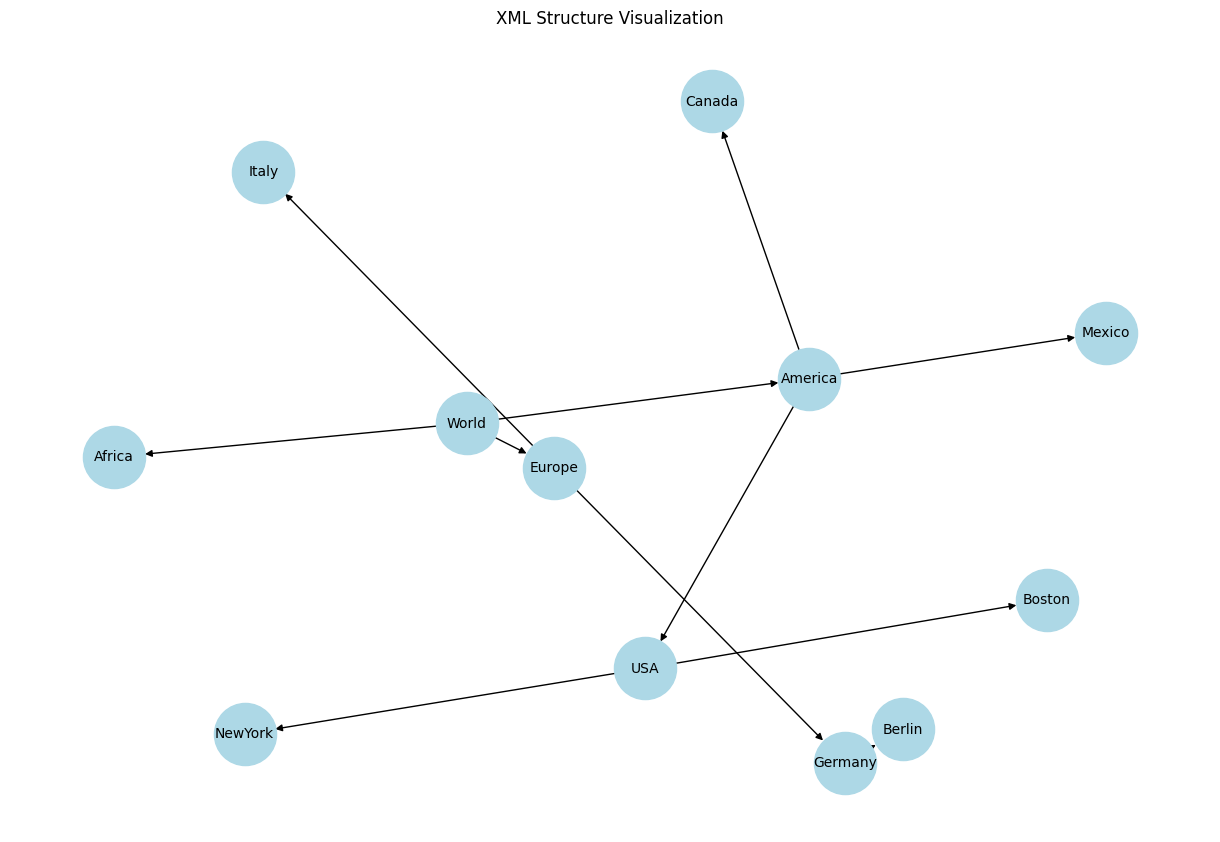

In [11]:
#networkx attempt 2
# Cell 2: XML to NetworkX Visualization
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

def xml_to_networkx(xml_string):
    root = ET.fromstring(xml_string)
    G = nx.DiGraph()

    def add_nodes(element, parent=None):
        G.add_node(element.tag)
        if parent:
            G.add_edge(parent, element.tag)
        for child in element:
            add_nodes(child, element.tag)

    add_nodes(root)
    return G

# Use the same xml_string as defined above
G = xml_to_networkx(xml_string)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=10, arrows=True)
plt.title("XML Structure Visualization")
plt.show()

In [12]:
#fix for graphviz
# Cell 3: Install Graphviz
!pip install graphviz

DEPRECATION: Loading egg at c:\users\genes\anaconda3\envs\my_quant_lab311\lib\site-packages\ibapi-10.19.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [13]:
# Cell 3: XML to Graphviz Visualization
from graphviz import Digraph

def xml_to_graphviz(xml_string):
    root = ET.fromstring(xml_string)
    dot = Digraph(comment='XML Structure')
    dot.attr(rankdir='TB')

    def add_nodes(element, parent=None):
        dot.node(element.tag, element.tag)
        if parent:
            dot.edge(parent, element.tag)
        for child in element:
            add_nodes(child, element.tag)

    add_nodes(root)
    return dot

# Generate and display graph
dot = xml_to_graphviz(xml_string)
dot.render('xml_structure', format='png', cleanup=True)

'xml_structure.png'

"""
XML extension for PlantUML
https://github.com/tefra/xsdata-plantuml
"""